# Final Project - Synthesizing Geospatial Analysis Workflow

In this final module, you are tasked with executing a geospatial analysis workflow that will incorporate many of the analysis skills that have been covered throughout the course. Example workflow output can be found [here](ExampleResults-GeospatialWorkflow.ipynb).

### Load relevant libraries

Documentation for the R libraries used in this notebook can be found at: 
   
  
  - [rgdal library](https://web.dsa.missouri.edu/static/PDF/R/rgdal.pdf)   
  
  - [classInt library](https://web.dsa.missouri.edu/static/PDF/R/classInt.pdf)
  
  - [spdep library](https://web.dsa.missouri.edu/static/PDF/R/spdep.pdf)
  
  - [rgeos library](https://web.dsa.missouri.edu/static/PDF/R/rgeos.pdf)
  
  - [gstat library](https://web.dsa.missouri.edu/static/PDF/R/gstat.pdf)
  
  - [sp library](https://web.dsa.missouri.edu/static/PDF/R/sp.pdf)
  
  - [geoR library](https://web.dsa.missouri.edu/static/PDF/R/geoR.pdf)
  
  - [GISTools library](https://web.dsa.missouri.edu/static/PDF/R/GISTools.pdf)
  
  - [raster library](https://web.dsa.missouri.edu/static/PDF/R/raster.pdf)

In [1]:
## Load relevant R packages.
inLibraries = list('repr','rgeos','rgdal','spdep','spatialreg','gstat','classInt','geoR','GISTools','sp','raster', 'stringr', 'ggplot2')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}

## Resize plot area.
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
“no DISPLAY variable so Tk is not available”

## Vehicle Crash Data

In this final project, you are to work with vehicle crash data for the state of Indiana. The dataset (indianacrashes/Dec2013Crashes.shp) is a point featureclass representing crash locations reported in December 2013. For the crash data, you can find some basic info in the Aries Manual:  https://www.ariesportal.com/Downloads/Download?icon=fa-download .  Also you can download one of the actual datasets: https://hub.mph.in.gov/dataset/aries-crash-data-2007-2017  and you'll see that for most non-intuitive variables, there is code variable (e.g., 'Weathercde') and a descriptor variable (e.g., 'weatherdscr') that explains what that code means. I had to truncate the dataset quite a bit b/c of its size.  So, some of the variables in the gis dataset may not be exactly the same as in the actual csv data from the website.The dataset (indianacrashes/INRoads) is a line featureclass representing [HPMS road data](https://web.dsa.missouri.edu/static/PDF/R/hpms_field_manual_dec2016.pdf)  (External source: https://www.fhwa.dot.gov/policyinformation/hpms/fieldmanual).

In this project, the goal is to analyze vehicle crashes.  Vehicle crashes can be analyzed at the individual or point level (i.e., the different locations of the crashes), at the road or line level (i.e., as aggregated to the different road segments in a region), or at an area level (i.e., as aggregated to some polygon analysis area). I've provided you with the point data ('Dec2013Crashes.shp').  However, I'd like you aggregate the crash data to the road segments that have been provided.  Also, I'd like you to aggregate the crash data to three different polygon-based representations of the region.  Task Set A will focus on this data preparation effort.

In Task Set B, the focus will be on conducting analysis at different levels of aggregation. In this task set, you have lots of freedom as to how to proceed. At this point, you should have point-based crashes, line-based crashes, and 3 polygon-based representations of crashes. You must pick at least 3 different geographic representations of the crash data for the analysis. At least 2 of these 3 must be of different data types (i.e., point and polygons; polygons and line; point and line;point,line and polygon).  Then for each of the 3 datasets you select, you should apply a set of geospatial analyses to the data.  You can accomplish this in a range of ways.  For example, one option could be to apply the same general set of analysis to each of the three datasets and then compare the results to understand the impact of MAUP. Another option might be to conduct a separate set of analyses on each dataset to evaluate a different facet of vehicle accidents. You are free to using any of the methods described in the course or any other geospatial techniques that you may have come across.  Although there are no limits to the number of analyses you can apply to the datasets, you should attempt at least two.  

Although there are many assumptions that are involved in applying many of the analysis methods covered in the course, there is no need to be overly concerned with them in this final project. The major point of this practice is to get some experience integrating geospatial methods in a logical workflow.  Ensuring that all assumptions have been met prior to and during the application of a method typically much more time than we have for this project.  Moreover, I'd rather you spend more time exploring potential methods and hopefully find some interesting applications (even if they may not be 100% justifiable).  For example, if the data do not reflect a normal distribution and the method you want to implement requires that assumption to be met, you could either apply a simple transformation or proceed without transforming but detailing that decision in the summary at the end of the notebook.

To begin, you'll first want to look over the attributes of the crash and road datasets to see what's available for analysis. Of course, you are free to use other sources of data as well. For example, we've used some nation-wide county level data (i.e. the US farming and US county datasets) that could be of use. If you find any other geospatial information that could be helpful to you or others in the class, let me know and I can try and upload that as well.

## TASK SET A:  DATA PROCESSING

The first set of tasks is related to data preparation.  Example output for some of the tasks can be found [here](ExampleResults-GeospatialWorkflow.ipynb).

**Task 1:** Read in the crash location, road, and transportation analysis zone (indianacrashes/INTAZ.shp) featureclasses. The spatial data frames that are read in should be named 'crashpoints', 'roads', and 'tazs', respectively.  As you read in the data, store the new spatial dataframes in a vector that can be referenced in subsequent tasks.

In [2]:
## 1. Develop your code for Task 1 here.
## --------------------------------------
## Read in the crash locations (points).
crashpoints <- readOGR("/dsa/data/geospatial/DS8612/indianacrashes","Dec2013Crashes",GDAL1_integer64_policy=TRUE)

## Read in the roads.
roads <- readOGR("/dsa/data/geospatial/DS8612/indianacrashes","INRoads",GDAL1_integer64_policy=TRUE)

## Read in the transportation analysis zone.
tazs <- readOGR("/dsa/data/geospatial/DS8612/indianacrashes","INTAZ",GDAL1_integer64_policy=TRUE)

IndianaData <- c(crashpoints,roads,tazs)

OGR data source with driver: ESRI Shapefile 
Source: "/dsa/data/geospatial/DS8612/indianacrashes", layer: "Dec2013Crashes"
with 12283 features
It has 28 fields
Integer64 fields read as doubles:  COUNTYCDE TOWNSHIPCD CITYCDE COLLDAYWEE MOTORVEHIN INJUREDNMB DEADNMB DEERNMB PROPDAMAGE RDWYCLASSC LIGHTCONDC WEATHERCDE SURFACECON MEDIANTYPE RDWYJUNCTI RDWYCHARCD SURFACETYP PRIMARYFAC DAMAGEESTI MANNERCOLL 
OGR data source with driver: ESRI Shapefile 
Source: "/dsa/data/geospatial/DS8612/indianacrashes", layer: "INRoads"
with 21270 features
It has 70 fields
Integer64 fields read as doubles:  URBAN_CODE AADT ROUTE_NUM AADT_SGL_U AADT_COMBI FUT_AADT NUM_SGLS STOP_SGNS AT_G_OTHER LANE_WIDTH RouteID 
OGR data source with driver: ESRI Shapefile 
Source: "/dsa/data/geospatial/DS8612/indianacrashes", layer: "INTAZ"
with 6218 features
It has 12 fields


**Task 2:** Align the coordinate reference systems (CRS) of the input spatial dataframes to a common CRS.

- a) Select a region appropriate universal transverse mercator (UTM) CRS with measurement units in meters. Create a new variable named 'regionCRS' that stores the information about the CRS (hint: CRS()).

- b) Create a vector that contains the names to be associated with the spatial data frames once they have been assigned a common CRS.  Their new names should be 'crashpointsUTM', 'roadsUTM', and 'tazsUTM', respectively.

- c) Develop code that iterates over all of the input spatial dataframes and compares the CRS of the input spatial data frames with that of the selected regionally appropriate CRS.  If the CRSs differ, transforms the CRS of the input spatial dataframes into a region-appropriate CRS. Finally, assign the transformed spatial dataframes a new name as specified in step b.  


In [3]:
## Create a data frame that contains available EPSG Codes.
EPSG <- make_EPSG()

## Find projections specific to Missouri.
i <- grep("INDIANA", EPSG$note, ignore.case=TRUE)

EPSG[i, ]

,code,note,prj4
,<I<int>>,<I<chr>>,<I<chr>>
736,2244,# NAD83 / Indiana East (ftUS) (deprecated),+proj=tmerc +lat_0=37.5 +lon_0=-85.66666666666667 +k=0.999966667 +x_0=99999.99989839978 +y_0=249364.9987299975 +datum=NAD83 +units=us-ft +no_defs
737,2245,# NAD83 / Indiana West (ftUS) (deprecated),+proj=tmerc +lat_0=37.5 +lon_0=-87.08333333333333 +k=0.999966667 +x_0=900000 +y_0=249364.9987299975 +datum=NAD83 +units=us-ft +no_defs
1283,2792,# NAD83(HARN) / Indiana East,"+proj=tmerc +lat_0=37.5 +lon_0=-85.66666666666667 +k=0.999966667 +x_0=100000 +y_0=250000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
1284,2793,# NAD83(HARN) / Indiana West,"+proj=tmerc +lat_0=37.5 +lon_0=-87.08333333333333 +k=0.999966667 +x_0=900000 +y_0=250000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
1380,2889,# NAD83(HARN) / Indiana East (ftUS) (deprecated),"+proj=tmerc +lat_0=37.5 +lon_0=-85.66666666666667 +k=0.999966667 +x_0=99999.99989839978 +y_0=249364.9987299975 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=us-ft +no_defs"
1381,2890,# NAD83(HARN) / Indiana West (ftUS) (deprecated),"+proj=tmerc +lat_0=37.5 +lon_0=-87.08333333333333 +k=0.999966667 +x_0=900000 +y_0=249364.9987299975 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=us-ft +no_defs"
1456,2965,# NAD83 / Indiana East (ftUS),+proj=tmerc +lat_0=37.5 +lon_0=-85.66666666666667 +k=0.999966667 +x_0=99999.99989839978 +y_0=249999.9998983998 +datum=NAD83 +units=us-ft +no_defs
1457,2966,# NAD83 / Indiana West (ftUS),+proj=tmerc +lat_0=37.5 +lon_0=-87.08333333333333 +k=0.999966667 +x_0=900000 +y_0=249999.9998983998 +datum=NAD83 +units=us-ft +no_defs
1458,2967,# NAD83(HARN) / Indiana East (ftUS),"+proj=tmerc +lat_0=37.5 +lon_0=-85.66666666666667 +k=0.999966667 +x_0=99999.99989839978 +y_0=249999.9998983998 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=us-ft +no_defs"


In [4]:
## 2. Develop your code for Task 2 here.
## --------------------------------------
IndianaNames <- c("crashpointsUTM", "roadsUTM", "tazsUTM")

## chosen epsg: 2793
regionCRS <- CRS("+init=epsg:2793")

for(i in 1:length(IndianaData)){
    if(identical(sort(unlist(str_split(IndianaData[[i]]@proj4string, ' '))), sort(unlist(str_split(regionCRS, ' ')))) == FALSE){
    transformed <- spTransform(IndianaData[[i]], regionCRS)
    assign(paste0(IndianaNames[i]), transformed)
    }
}

print(crashpointsUTM@proj4string)
print(roadsUTM@proj4string)
print(tazsUTM@proj4string)


CRS arguments:
 +init=epsg:2793 +proj=tmerc +lat_0=37.5 +lon_0=-87.08333333333333
+k=0.999966667 +x_0=900000 +y_0=250000 +ellps=GRS80
+towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
CRS arguments:
 +init=epsg:2793 +proj=tmerc +lat_0=37.5 +lon_0=-87.08333333333333
+k=0.999966667 +x_0=900000 +y_0=250000 +ellps=GRS80
+towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
CRS arguments:
 +init=epsg:2793 +proj=tmerc +lat_0=37.5 +lon_0=-87.08333333333333
+k=0.999966667 +x_0=900000 +y_0=250000 +ellps=GRS80
+towgs84=0,0,0,0,0,0,0 +units=m +no_defs 


**Task 3:** While these datasets are not really that large, they are large enough to give jupyterhub a hard time. Thus, it is always good to take a smaller sample of the data (i.e., roads/crashes in this application) to facilitate troubleshooting when developing your analysis workflow vs. working with the larger dataset.  To assist with this, we can use the TAZ areas for Indiana 'tazsUTM'. Every TAZ has a county attribute (the county FIPS code 'COUNTYFP10') which could be used to query TAZs for a set of counties. Let's start by selecting the TAZs within a contiguous 3-8 county area of the state to use as our primary analysis region for subsequent tasks in this project. Then we can select subsets of the crash and road datasets that fall within our new study area.

- a) Select a set of TAZs covering a contiguous set of 3 to 8 counties and name this subset 'SelectedtazsUTM'. This could be done in a variety of ways.  For example, you could look up the FIPS codes of counties online or in the datasets and then create a vector of ids for a set of contiguous counties and render those counties as a new spatial data frame; you could create and query a neighborhood object, etc. 
    
- b) Create a single spatial polygon feature based upon the union of the selected counties and name it 'StudyRegion'.
    
- c) Then, create subsets of the crash ('crashpointsUTM') and road ('roadsUTM') datasets that fall within the unioned analysis region.  Name these subsets 'selectedcrashpointsUTM' and 'selectedroadsUTM', respectively.

- d)  Finally, create a map of the TAZs, roads, and crashes within your selected study area.

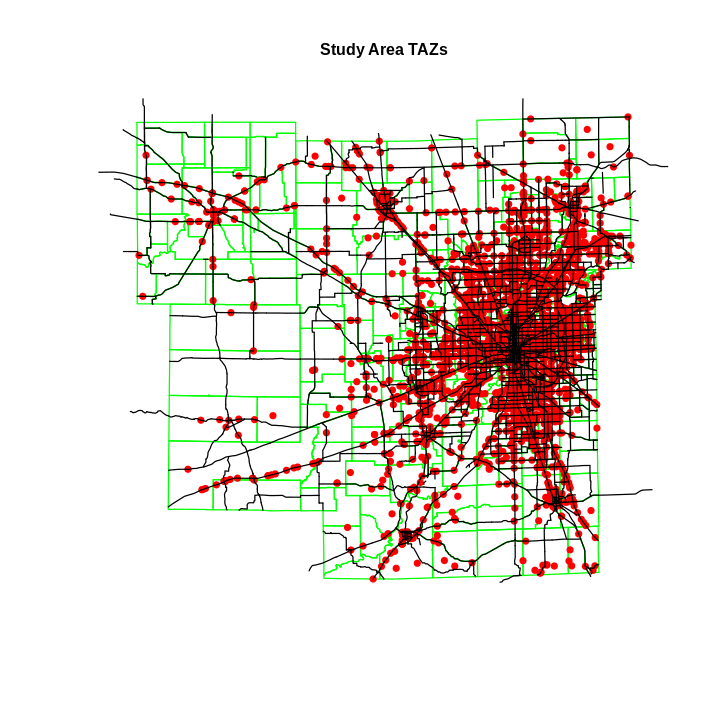

In [5]:
## 3. Develop your code for Task 3 here.
## --------------------------------------
IndianaUTM <- c(crashpointsUTM, roadsUTM)
selectedNames <- c("selectedcrashpointsUTM", "selectedroadsUTM")

## Subset tazs within desired counties (Montomery Co [107], Boone Co [011], Putnam Co [133], Hendricks Co [063], 
## Hamilton Co [057], Marion Co [097], Morgan Co [109], Johnson Co [081])
selectedtazsUTM <- tazsUTM[tazsUTM$COUNTYFP10 %in% c('107','011','133','063','057','097','109','081'),]

# create single spatialpolygon
StudyRegion <- gUnaryUnion(selectedtazsUTM)

# create crashpoint and roads subsets for selected TAZs
for(i in 1:length(selectedNames)){
    region <- overGeomGeom(StudyRegion, IndianaUTM[[i]], returnList = TRUE, fn = NULL)
    intSet = unlist(region)
    stuffs <- IndianaUTM[[i]][c(intSet),]
    assign(paste0(selectedNames[i]), stuffs)
}

plot(selectedtazsUTM, border='green',main="Study Area TAZs",cex.main=.8)
points(selectedcrashpointsUTM, col = 'red', pch = 20)
plot(selectedroadsUTM, add=TRUE,col='black')

**Task 4:** Develop code that iterates over the input datasets, checks for a field named 'road.id' (in the road dataset) and one named 'crash.id' (in the crash dataset) and one named 'LENGTHMETER' (for the crash point and road data only).  If the 'road.id' field is present (in the road data), set the values to be an unique integer index for each feature. If the 'road.id' field is not present, add the field and assign each feature an unique id.  If the 'crash.id' field is present (in the crash data), set the values to be an unique integer index for each feature. If the 'crash.id' field is not present, add the field and assign each feature an unique id.  If the 'LENGTHMETER' field is not present, add it and set the value for each feature to be the length of the feature in meters.  


In [6]:
## 4. Develop your code for Task 4 here.
## --------------------------------------
slectedIndianaUTM <- c(selectedcrashpointsUTM,selectedroadsUTM)

# check for and create unique id and "LENGTHMETER" columns in selectedcrashpointsUTM and selectedroadsUTM dataframes
for(i in 1:length(slectedIndianaUTM)){
    if(!("LENGTHMETER" %in% names((slectedIndianaUTM[[i]]@data)))){
        lfield <- c("LENGTHMETER")
        slectedIndianaUTM[[i]]@data[,lfield] <- gLength(slectedIndianaUTM[[i]],byid=TRUE)
        assign(paste0(selectedNames[i]), slectedIndianaUTM[i])
    }
    if(i == 1){
        if(!("crash.id" %in% names((slectedIndianaUTM[[i]]@data)))){
            cfield <- c("crash.id")
            slectedIndianaUTM[[i]]@data[,cfield] <- seq.int(nrow(slectedIndianaUTM[[i]]@data))
            assign(paste0(selectedNames[i]), slectedIndianaUTM[i])
        }
        else{
            cfield <- c("crash.id")
            slectedIndianaUTM[[i]]@data[,cfield] <- seq.int(nrow(slectedIndianaUTM[[i]]@data))
            assign(paste0(selectedNames[i]), slectedIndianaUTM[i])
        }
    }
    if(i == 2){
        if(!("road.id" %in% names((slectedIndianaUTM[[i]]@data)))){
            rfield <- c("road.id")
            slectedIndianaUTM[[i]]@data[,rfield] <- seq.int(nrow(slectedIndianaUTM[[i]]@data))
            assign(paste0(selectedNames[i]), slectedIndianaUTM[i])
        }
        else{
            rfield <- c("road.id")
            slectedIndianaUTM[[i]]@data[,rfield] <- seq.int(nrow(slectedIndianaUTM[[i]]@data))
            assign(paste0(selectedNames[i]), slectedIndianaUTM[i])
        }
    }
    
}

summary(selectedcrashpointsUTM[[1]]@data)
summary(selectedroadsUTM[[1]]@data)


   COUNTYCDE     TOWNSHIPCD       CITYCDE          COLLDTE       COLLDAYWEE   
 Min.   :  5   Min.   :    0   Min.   :    0   20131206: 226   Min.   :1.000  
 1st Qu.: 63   1st Qu.:13060   1st Qu.:36000   20131205: 197   1st Qu.:2.000  
 Median : 97   Median :51579   Median :36000   20131213: 192   Median :4.000  
 Mean   : 84   Mean   :46222   Mean   :36356   20131216: 174   Mean   :4.129  
 3rd Qu.: 97   3rd Qu.:80144   3rd Qu.:36000   20131218: 163   3rd Qu.:6.000  
 Max.   :175   Max.   :85580   Max.   :86372   20131210: 158   Max.   :7.000  
                                               (Other) :2736                  
   COLLTIMETX   COLLTIMEAM   COLLTIMEMI     MOTORVEHIN      INJUREDNMB    
 0800   :  30   A:1393     1700   :  23   Min.   :1.000   Min.   :0.0000  
 0620   :  28   P:2453     1820   :  22   1st Qu.:2.000   1st Qu.:0.0000  
 0630   :  26              1750   :  20   Median :2.000   Median :0.0000  
 0730   :  26              1600   :  19   Mean   :1.867   Mean   :0.

   YEAR_RECOR     STATE_CODE   BEG_POINT       END_POINT         F_SYSTEM    
 Min.   :2012   Min.   :18   Min.   : 0.00   Min.   : 0.009   Min.   :1.000  
 1st Qu.:2012   1st Qu.:18   1st Qu.: 0.00   1st Qu.: 0.680   1st Qu.:3.000  
 Median :2012   Median :18   Median : 0.34   Median : 2.050   Median :4.000  
 Mean   :2012   Mean   :18   Mean   : 2.95   Mean   : 4.143   Mean   :4.017  
 3rd Qu.:2012   3rd Qu.:18   3rd Qu.: 3.39   3rd Qu.: 5.020   3rd Qu.:5.000  
 Max.   :2012   Max.   :18   Max.   :29.00   Max.   :29.170   Max.   :6.000  
                                                                             
   URBAN_CODE      FACILITY_T      THROUGH_LA          AADT       
 Min.   : 2386   Min.   :1.000   Min.   : 1.000   Min.   :    31  
 1st Qu.:41212   1st Qu.:2.000   1st Qu.: 2.000   1st Qu.:  4254  
 Median :41212   Median :2.000   Median : 2.000   Median :  7644  
 Mean   :53674   Mean   :1.934   Mean   : 2.678   Mean   : 12632  
 3rd Qu.:41212   3rd Qu.:2.000   3rd Qu.:

**Task 5:** Select crash sites that are within 50m of a road segment. Report the total number of original crash sites and the number that are within 50m of a road segment. Retain this set of selected crash sites and create a map that depicts these locations and the set of road segments associated with these crashes. Be sure to add a proper map title, scalebar, etc. 


[1] 3145

[1] 701

[1] 3846

Warning message in title(...):
“"border" is not a graphical parameter”

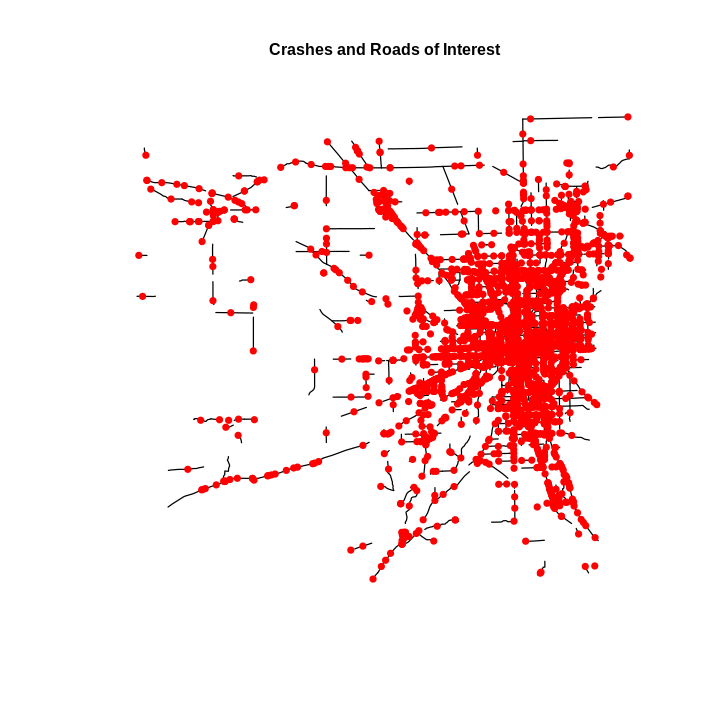

In [7]:
## 5. Develop your code for Task 5 here.
## --------------------------------------

study_area <- gBuffer(selectedroadsUTM[[1]], byid=TRUE, id=NULL, width=50, quadsegs=5, capStyle="ROUND", joinStyle="ROUND", mitreLimit=1.0)

over_road <- over(selectedcrashpointsUTM[[1]], study_area, returnList = FALSE)

on_road_crashes <- over_road[!(is.na(over_road$road.id)),]
off_road <- over_road[is.na(over_road$road.id),]
crashes_off_road <- selectedcrashpointsUTM[[1]][unlist(rownames(off_road)),]
crashes_on_road <- selectedcrashpointsUTM[[1]][unlist(rownames(on_road_crashes)),]

## Check to ensure subsetting worked properly
nrow(crashes_on_road)
nrow(crashes_off_road)
nrow(selectedcrashpointsUTM[[1]])

road_segs <- selectedroadsUTM[[1]][selectedroadsUTM[[1]]@data$road.id %in% c(on_road_crashes$road.id),]

plot(road_segs, border='black',main="Crashes and Roads of Interest",cex.main=.8)
points(crashes_on_road, col = 'red', pch = 20)

**Task 6:** Aggregate the crash locations within 50m of a road to the appropriate road segment such as to determine the number of crashes per road segment.  Compute the number of crashes per mile in a new column named "CrashesPerMile" in the road dataset. Create a map to visualize the crashes per mile.  Be sure to add a proper map title, scalebar, etc.  Hint: This could be done in a variety of ways, one option may be to link the buffered segments with the crash points. Then, the frequency of each segment id could be computed and then later related back to the segments.  Recall the lab on spatial joins?


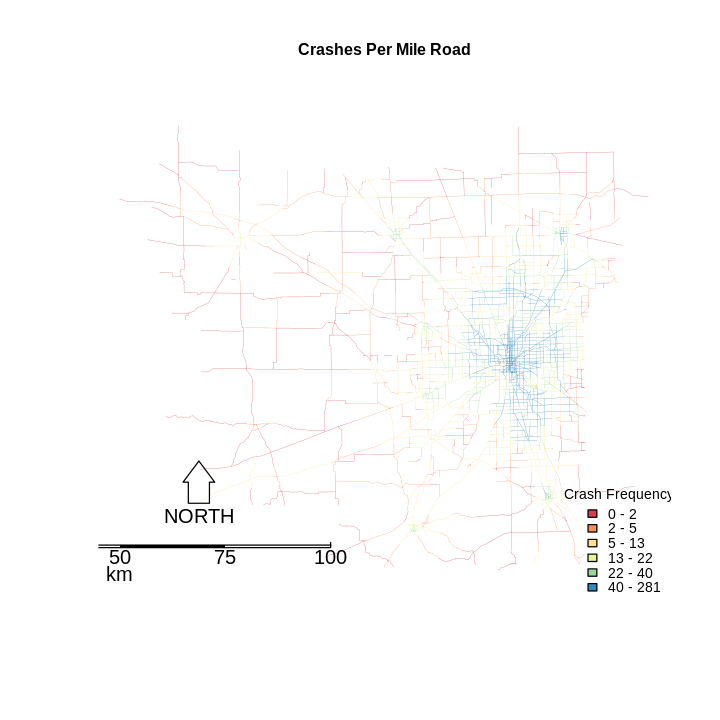

In [8]:
## 6. Develop your code for Task 6 here.
## --------------------------------------
## Aggregate the number of crashes per mile for each segment of road
selectedroadsUTM[[1]]@data$CrashesPerMile <- NA

for(i in 1:length(selectedroadsUTM[[1]])){
    study_area2 <- gBuffer(selectedroadsUTM[[1]][i,], byid=TRUE, id=NULL, width=1609.344, quadsegs=5, capStyle="ROUND", joinStyle="ROUND", mitreLimit=1.0)
    over_road2 <- over(selectedcrashpointsUTM[[1]], study_area2, returnList = FALSE)
    selectedroadsUTM[[1]]@data[i,]$CrashesPerMile <- nrow(over_road2[!(is.na(over_road2$road.id)),])
}

## Map aggregates
# Classify the variable.
numcat <- 6
cate <- classIntervals(selectedroadsUTM[[1]]@data$CrashesPerMile, numcat, style="quantile")

## Assign colors to categories.
pal <- brewer.pal(numcat,"Spectral")
cols <- findColours(cate,pal)

## Visualize fitted SAR values.
plot(selectedroadsUTM[[1]], col=cols, lwd=.2,main="Crashes Per Mile Road",cex.main=.8)
brks <- round(cate$brks,3)
leg <- paste(brks[-(numcat+1)], brks[-1], sep=" - ")
legend("bottomright", fill=pal, legend=leg, bty="n",title="Crash Frequency",cex=.7)

extent <- bbox(selectedroadsUTM[[1]])
xmin<-extent[1,1]
xmax<-extent[1,2]
ymin<-extent[2,1]
ymax<-extent[2,2]

xa <- xmin + (xmax - xmin)*0.15
ya <- ymin + (ymax - ymin)*0.15
len <- 2500

xs <- xmin
ys <- ymin + (ymax - ymin)*0.05

north.arrow(xa,ya,len,lab='NORTH',cex.lab=1,tcol='black')

len2 <- 100000
ndivs <- 4
subdiv <- (len2/1000)/ndivs
map.scale(xs,ys,len2,units='km',ndivs,subdiv,tcol='black',sfcol='black')

**Task 7:** Iteratively generate 3 grid-based polygon analysis areas covering the extent of your study area, each with a different spatial resolution (i.e., polygon size).  For example, initialize the routine to start with a 2km cell size, increasing the cell size at 1 km intervals over each iteration (3 iterations i.e., 2km, 3km, 4km). Of course, if you are analyzing the entire state, then you'll want to use much larger cell sizes (i.e., starting at 20km).  Convert each of the grids into spatial polygon data frames and make sure each polygon has an unique id.  Report the number of polygons in each of the resulting analysis topologies. 3 polygon spatial data frames should be generated in this task.  


In [9]:
## 7. Develop your code for Task 7 here.
## --------------------------------------
## Retrieve the geographic extent of the study area.
minlon = min (coordinates(study_area)[,1])
maxlon = max (coordinates(study_area)[,1])
maxlat = max (coordinates(study_area)[,2])
minlat = min (coordinates(study_area)[,2])

long.range <- as.numeric(c(minlon, maxlon))  
lat.range <- as.numeric(c(minlat, maxlat))  

## Set the cell size of the interpolation grid.
cellsizes <- c(1000, 2000, 3000)

## Create list object to save grids to
grdNames <- c("grd1","grd2","grd3")

for(i in 1:length(cellsizes)){
    ## Create gridded area.
    grd <- expand.grid(x = seq(from = long.range[1], to = long.range[2], by = cellsizes[i]), y = seq(from = lat.range[1], 
        to = lat.range[2], by = cellsizes[i])) 

    ## Assign coordinates to grid.
    coordinates(grd) <- ~x + y

    ## Condition grid object.
    gridded(grd) <- TRUE

    ## Set the projection system to be that of original dataset.
    proj4string(grd)=proj4string(study_area)
    
    ## Convert to spatial polygons object
    polys <- as(grd, "SpatialPolygons")
    
    for(j in 1:length(row.names(polys))){
        polys@polygons[[j]]@ID <- paste(j)
    }
    
    grd_spd <- SpatialPolygonsDataFrame(polys, data=data.frame(id=seq.int(length(row.names(polys))), row.names=as.character(seq.int(length(row.names(polys))))))
    
    assign(paste0(grdNames[i]), grd_spd)
}


**Task 8:** Develop code that iterates over the set of 3 analysis areas generated in the previous task and maps them side-by-side (i.e., all in one row).

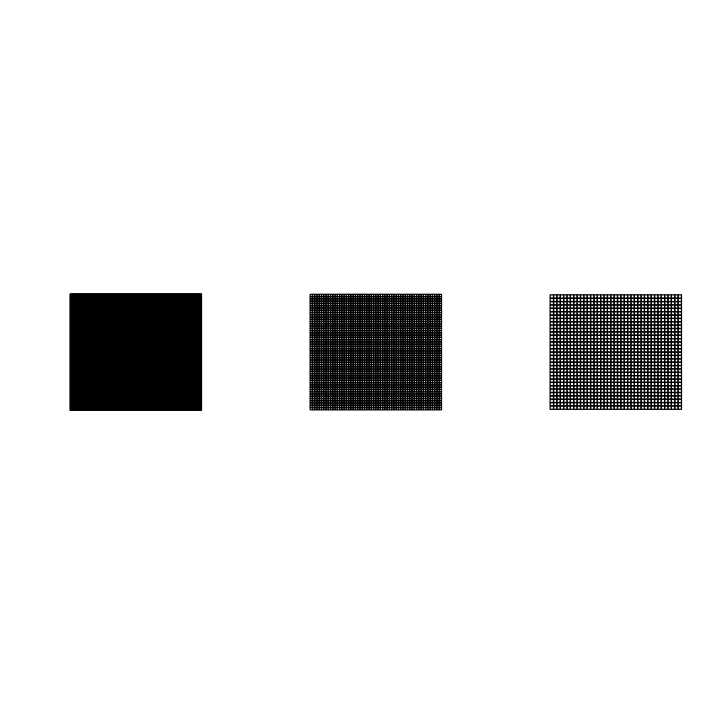

In [10]:
## 8. Develop your code for Task 8 here.
## --------------------------------------
grds <- c(grd1,grd2,grd3)

par(mfrow=c(1,length(grds)))

for(i in 1:length(grds)){
    plot(grds[[i]])
}


**Task 9:** Develop code that iterates over the 3 analysis polygon topologies and computes the number of crashes within each analysis polygon stored in a new column named "CrashesPerPolygon". 

In [11]:
## 9. Develop your code for Task 9 here.
## --------------------------------------

for(i in 1:length(grds)){
    over_top <- over(selectedcrashpointsUTM[[1]], grds[[i]], returnList = FALSE)
    over_top$CrashesPerPolygon <- 1
    # Aggregate data.
    aggregateevents <-aggregate(over_top, by=list(over_top$id),FUN=sum)
    # Merge aggregate data to grid polygons.
    merged <- merge(grds[[i]]@data, aggregateevents, by.x = "id",by.y="Group.1",all=TRUE)
    merged$CrashesPerPolygon[is.na(merged$CrashesPerPolygon)] <- 0
    merged <- merged[,!(names(merged) %in% c('id.y'))]
    ordered <- merged[order(merged$id),]
    grds[[i]]@data$CrashesPerPolygon <- ordered$CrashesPerPolygon
    # assign new grid to grid object
    assign(paste0(grdNames[i]), grds[i])
}


**Task 10:** Develop code to iterate over the 3 analysis polygon topologies and map the new crash frequency variable "CrashesPerPolygon". 

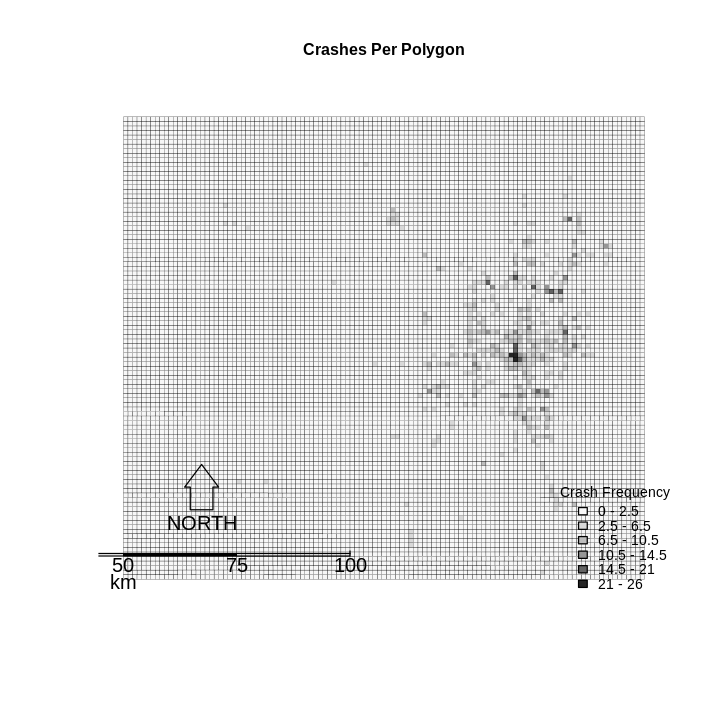

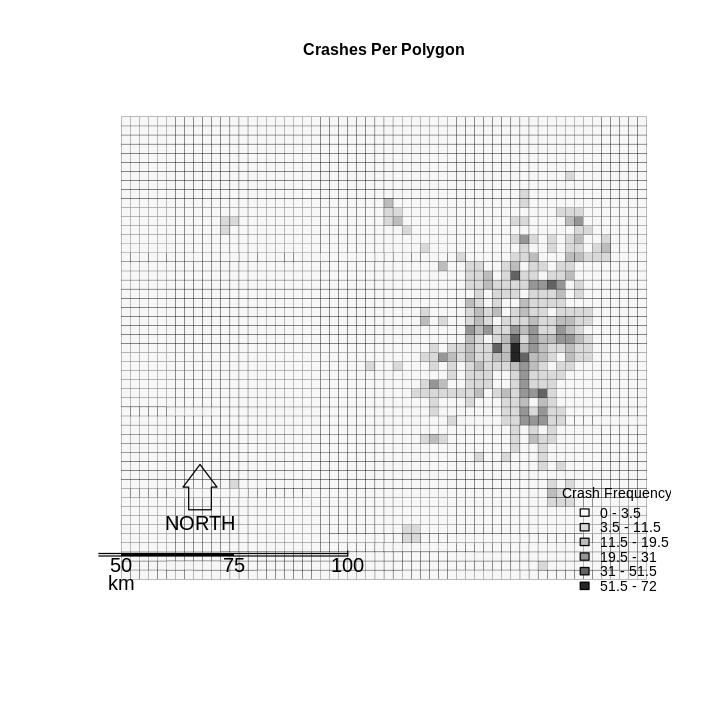

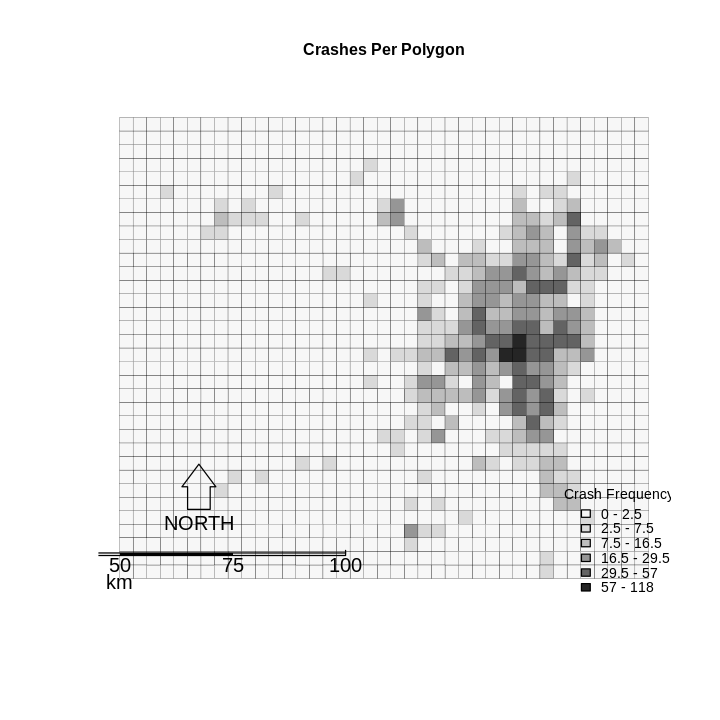

In [12]:
## 10. Develop your code for Task 10 here.
## --------------------------------------

for(i in 1:length(grds)){
    ## Classify the variable.
    numcat <- 6
    cate <- classIntervals(grds[[i]]@data$CrashesPerPolygon, numcat, style="kmeans")

    ## Assign colors to categories.
    pal <- brewer.pal(numcat,"Greys")
    cols <- findColours(cate,pal)

    ## Visualize maps.
    plot(grds[[i]], col=cols, lwd=.2,main="Crashes Per Polygon",cex.main=.8)
    brks <- round(cate$brks,3)
    leg <- paste(brks[-(numcat+1)], brks[-1], sep=" - ")
    legend("bottomright", fill=pal, legend=leg, bty="n",title="Crash Frequency",cex=.7)
    
    extent <- bbox(grds[[i]])
    xmin<-extent[1,1]
    xmax<-extent[1,2]
    ymin<-extent[2,1]
    ymax<-extent[2,2]

    xa <- xmin + (xmax - xmin)*0.15
    ya <- ymin + (ymax - ymin)*0.15
    len <- 2500

    xs <- xmin
    ys <- ymin + (ymax - ymin)*0.05

    north.arrow(xa,ya,len,lab='NORTH',cex.lab=1,tcol='black')

    len2 <- 100000
    ndivs <- 4
    subdiv <- (len2/1000)/ndivs
    map.scale(xs,ys,len2,units='km',ndivs,subdiv,tcol='black',sfcol='black')
}



**Task 11:** For each of the 3 analysis polygon topologies, compute the total miles of road features within each polygon and store that value in a new field named 'TotalRoadMiles'.

In [13]:
## 11. Develop your code for Task 11 here.
## --------------------------------------
for(i in 1:length(grds)){
    intersects <- intersect(selectedroadsUTM[[1]], grds[[i]])
    intersects@data$TotalRoadMiles <- NA
    intersects@data$TotalRoadMiles <- as.numeric(intersects$TotalRoadMiles)
    for(j in 1:length(intersects)){
        intersects@data[j,]$TotalRoadMiles <- as.numeric(gLength(intersects[j,]))
    }
    
    # Multiply desired features to normalize in later step
    intersects@data$Speed_length <- intersects@data$SPEED_LIMT*intersects@data$TotalRoadMiles
    intersects@data$AADT_length <- intersects@data$AADT*intersects@data$TotalRoadMiles
    intersects@data$Sig_length <- intersects@data$NUM_SGLS*intersects@data$TotalRoadMiles
    intersects@data$Stop_length <- intersects@data$STOP_SGNS*intersects@data$TotalRoadMiles
    intersects@data$OtherInt_length <- intersects@data$AT_G_OTHER*intersects@data$TotalRoadMiles
    intersects@data$LW_length <- intersects@data$LANE_WIDTH*intersects@data$TotalRoadMiles
    
    ## Create a simplified intersects dataset.
    retainedvariables <- c("id","TotalRoadMiles", "Speed_length", "AADT_length", "Sig_length", "Stop_length", "OtherInt_length", "LW_length")
    polyevents <- intersects@data[retainedvariables]

    # Aggregate polyevents to aquire TotalRoadMiles per polygon
    aggregateevents <-aggregate(polyevents, by=list(polyevents$id),FUN=sum)

    # Merge aggregate data to grid polygons.
    merged <- merge(grds[[i]]@data, aggregateevents, by.x = "id",by.y="Group.1",all=TRUE)
    
    # replace NA's with zeros
    merged$TotalRoadMiles[is.na(merged$TotalRoadMiles)] <- 0
    merged$Speed_length[is.na(merged$Speed_length)] <- 0
    merged$AADT_length[is.na(merged$AADT_length)] <- 0
    merged$Sig_length[is.na(merged$Sig_length)] <- 0
    merged$Stop_length[is.na(merged$Stop_length)] <- 0
    merged$OtherInt_length[is.na(merged$OtherInt_length)] <- 0
    merged$LW_length[is.na(merged$LW_length)] <- 0
    
    # Divide by total length in polygon to normalize the data over polygons (feature as density of polygon)
    merged$Avg_Speed <- merged$Speed_length/merged$TotalRoadMiles
    merged$AADT_density <- merged$AADT_length/merged$TotalRoadMiles
    merged$Sig_density <- merged$Sig_length/merged$TotalRoadMiles
    merged$Stop_density <- merged$Stop_length/merged$TotalRoadMiles
    merged$OtherInt_density <- merged$OtherInt_length/merged$TotalRoadMiles
    merged$LW_density <- merged$LW_length/merged$TotalRoadMiles
    
    merged$Avg_Speed[is.na(merged$Avg_Speed)] <- 0
    merged$AADT_density[is.na(merged$AADT_density)] <- 0
    merged$Sig_density[is.na(merged$Sig_density)] <- 0
    merged$Stop_density[is.na(merged$Stop_density)] <- 0
    merged$OtherInt_density[is.na(merged$OtherInt_density)] <- 0
    merged$LW_density[is.na(merged$LW_density)] <- 0
    
    ordered <- merged[order(merged$id),]
    grds[[i]]@data$TotalRoadMiles <- ordered$TotalRoadMiles
    grds[[i]]@data$Avg_Speed <- ordered$Avg_Speed
    grds[[i]]@data$AADT_density <- ordered$AADT_density
    grds[[i]]@data$Sig_density <- ordered$Sig_density
    grds[[i]]@data$Stop_density <- ordered$Stop_density
    grds[[i]]@data$OtherInt_density <- ordered$OtherInt_density
    grds[[i]]@data$LW_density <- ordered$LW_density
    # assign new grid to grid object
    assign(paste0(grdNames[i]), grds[i])
}


**Task 12:** Iterate through analysis polygons and visualize the total length of roads 'TotalRoadMiles' in each analysis polygon. Be sure to add a proper map title, scalebar, etc.

Warning message in classIntervals(grds[[i]]@data$TotalRoadMiles, numcat, style = "kmeans"):
“N is large, and some styles will run very slowly; sampling imposed”

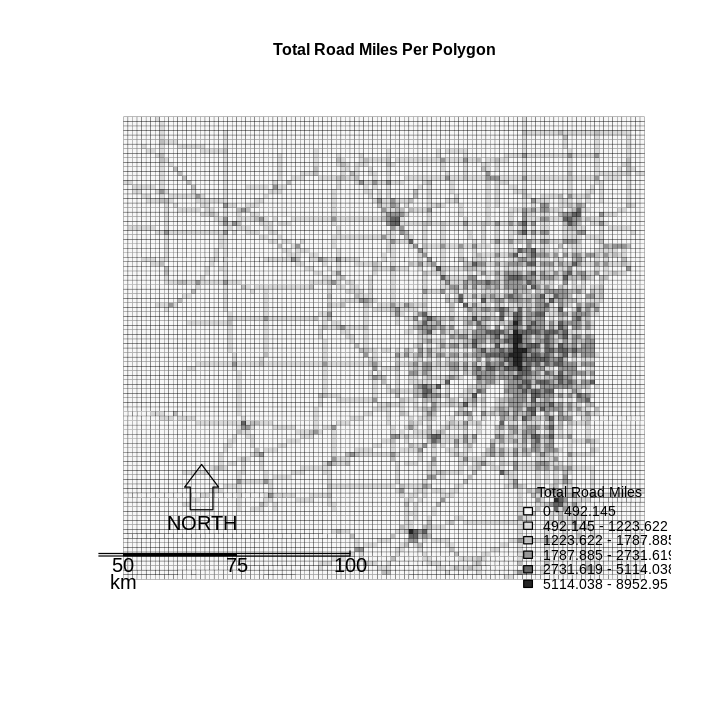

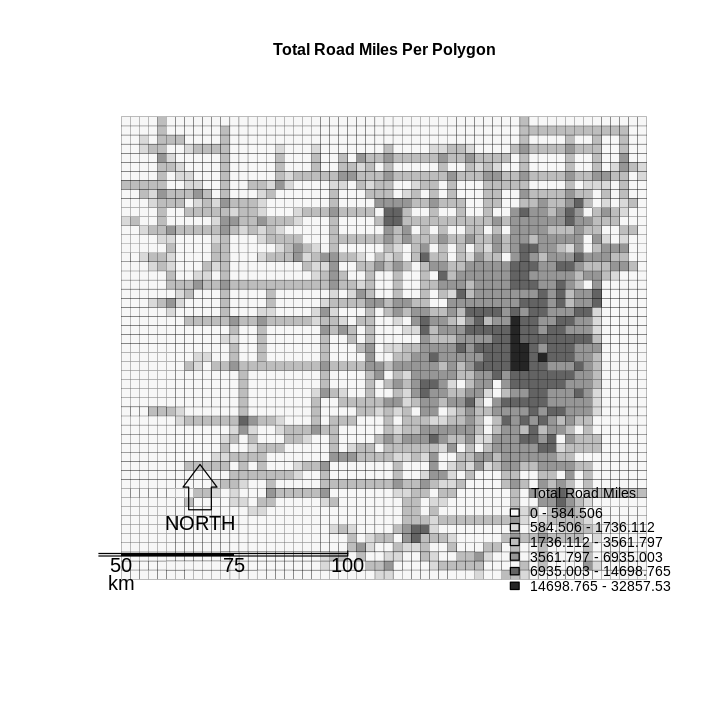

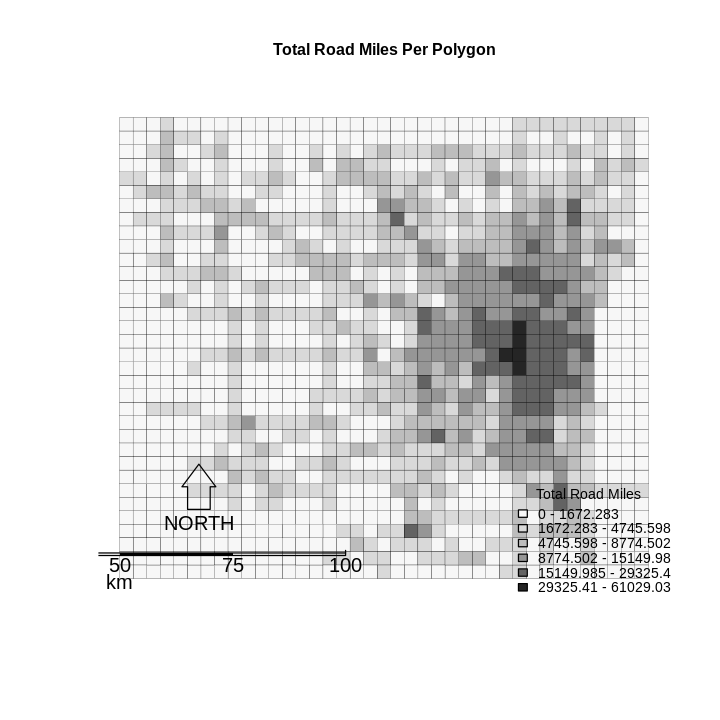

In [14]:
## 12. Develop your code for Task 12 here.
## --------------------------------------

for(i in 1:length(grds)){
    ## Classify the variable.
    numcat <- 6
    cate <- classIntervals(grds[[i]]@data$TotalRoadMiles, numcat, style="kmeans")

    ## Assign colors to categories.
    pal <- brewer.pal(numcat,"Greys")
    cols <- findColours(cate,pal)

    ## Visualize maps.
    plot(grds[[i]], col=cols, lwd=.2,main="Total Road Miles Per Polygon",cex.main=.8)
    brks <- round(cate$brks,3)
    leg <- paste(brks[-(numcat+1)], brks[-1], sep=" - ")
    legend("bottomright", fill=pal, legend=leg, bty="n",title="Total Road Miles",cex=.7)
    
    extent <- bbox(grds[[i]])
    xmin<-extent[1,1]
    xmax<-extent[1,2]
    ymin<-extent[2,1]
    ymax<-extent[2,2]

    xa <- xmin + (xmax - xmin)*0.15
    ya <- ymin + (ymax - ymin)*0.15
    len <- 2500

    xs <- xmin
    ys <- ymin + (ymax - ymin)*0.05

    north.arrow(xa,ya,len,lab='NORTH',cex.lab=1,tcol='black')

    len2 <- 100000
    ndivs <- 4
    subdiv <- (len2/1000)/ndivs
    map.scale(xs,ys,len2,units='km',ndivs,subdiv,tcol='black',sfcol='black')
}



# Task SET B - ANALYSIS

As described earlier, this section can be formatted in a range of ways depending on how you decide to approach the problem. Feel free to use as many code blocks as you wish.

**Task 13:** Dataset 1 Analysis.

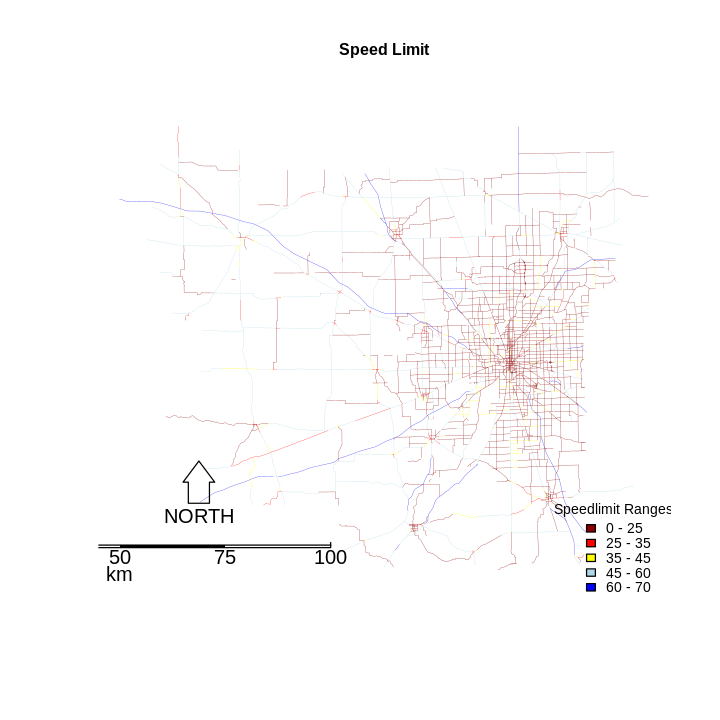

In [15]:
## 13. Develop your code for the analysis of Dataset 1 here.
## --------------------------------------
dataset1roads <- selectedroadsUTM[[1]][,c('SPEED_LIMT', 'road.id', 'CrashesPerMile')]
dataset1crashpoints <- selectedcrashpointsUTM[[1]]

## Map aggregates
# Classify the variable.
numcat <- 5
cate <- classIntervals(dataset1roads@data$SPEED_LIMT, numcat, style="fixed",fixedBreaks=c(0,25,35,45,60,70))

## Assign colors to categories.
pal <- c('red4','red','yellow','lightblue','blue')
cols <- findColours(cate,pal)

## Visualize values.
plot(dataset1roads, col=cols, lwd=.2,main="Speed Limit",cex.main=.8)
brks <- round(cate$brks,3)
leg <- paste(brks[-(numcat+1)], brks[-1], sep=" - ")
legend("bottomright", fill=pal, legend=leg, bty="n",title="Speedlimit Ranges",cex=.7)

extent <- bbox(dataset1roads)
xmin<-extent[1,1]
xmax<-extent[1,2]
ymin<-extent[2,1]
ymax<-extent[2,2]

xa <- xmin + (xmax - xmin)*0.15
ya <- ymin + (ymax - ymin)*0.15
len <- 2500

xs <- xmin
ys <- ymin + (ymax - ymin)*0.05

north.arrow(xa,ya,len,lab='NORTH',cex.lab=1,tcol='black')

len2 <- 100000
ndivs <- 4
subdiv <- (len2/1000)/ndivs
map.scale(xs,ys,len2,units='km',ndivs,subdiv,tcol='black',sfcol='black')

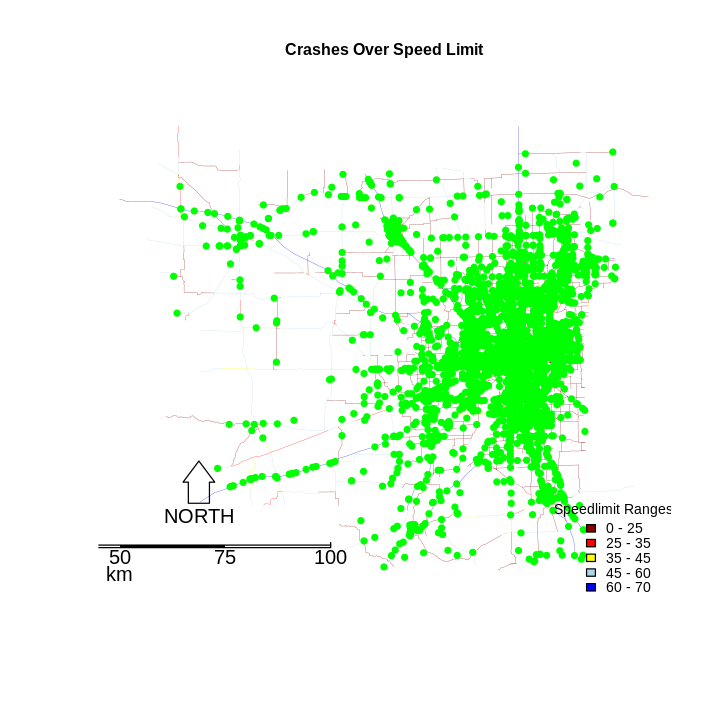

In [16]:
## Map aggregates
# Classify the variable.
numcat <- 5
cate <- classIntervals(dataset1roads@data$SPEED_LIMT, numcat, style="fixed",fixedBreaks=c(0,25,35,45,60,70))

## Assign colors to categories.
pal <- c('red4','red','yellow','lightblue','blue')
cols <- findColours(cate,pal)

## Visualize values.
plot(dataset1roads, col=cols, lwd=.2,main="Crashes Over Speed Limit",cex.main=.8)
points(dataset1crashpoints, col = 'green', pch = 20)
brks <- round(cate$brks,3)
leg <- paste(brks[-(numcat+1)], brks[-1], sep=" - ")
legend("bottomright", fill=pal, legend=leg, bty="n",title="Speedlimit Ranges",cex=.7)

extent <- bbox(dataset1roads)
xmin<-extent[1,1]
xmax<-extent[1,2]
ymin<-extent[2,1]
ymax<-extent[2,2]

xa <- xmin + (xmax - xmin)*0.15
ya <- ymin + (ymax - ymin)*0.15
len <- 2500

xs <- xmin
ys <- ymin + (ymax - ymin)*0.05

north.arrow(xa,ya,len,lab='NORTH',cex.lab=1,tcol='black')

len2 <- 100000
ndivs <- 4
subdiv <- (len2/1000)/ndivs
map.scale(xs,ys,len2,units='km',ndivs,subdiv,tcol='black',sfcol='black')

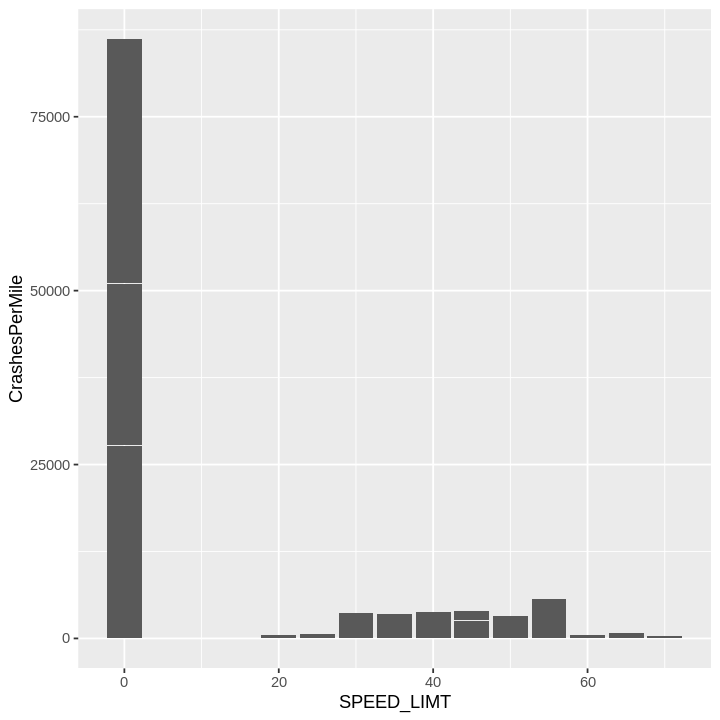

In [17]:
ggplot(data=dataset1roads@data, aes(x=SPEED_LIMT, y=CrashesPerMile)) + geom_bar(stat="identity")

**Task 14:** Dataset 2 Analysis.

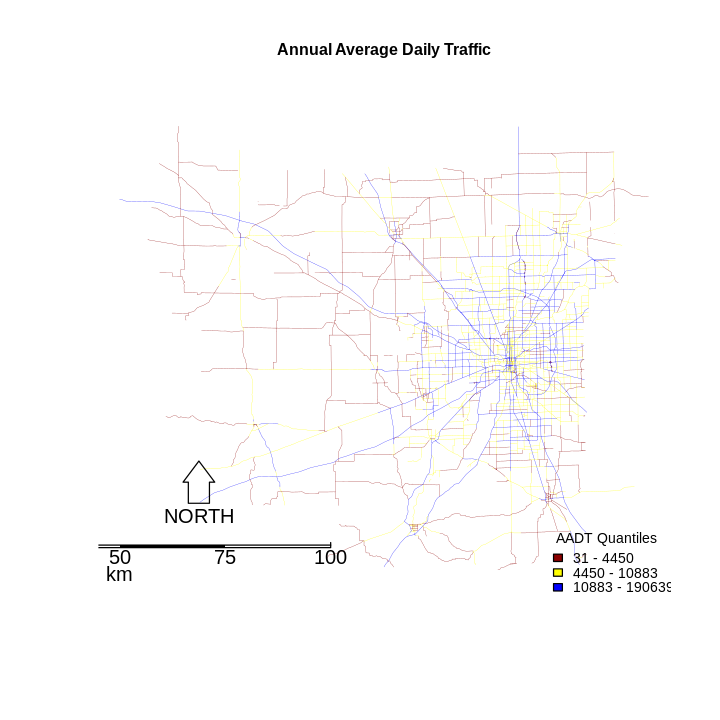

In [18]:
## 14. Develop your code for the analysis of Dataset 2 here.
## --------------------------------------
dataset2roads <- selectedroadsUTM[[1]][,c('AADT', 'road.id', 'CrashesPerMile')]
dataset2crashpoints <- selectedcrashpointsUTM[[1]]

## Map aggregates
# Classify the variable.
numcat <- 3
cate <- classIntervals(dataset2roads@data$AADT, numcat, style="quantile")

## Assign colors to categories.
pal <- c('red4','yellow','blue')
cols <- findColours(cate,pal)

## Visualize values.
plot(dataset2roads, col=cols, lwd=.2,main="Annual Average Daily Traffic",cex.main=.8)
brks <- round(cate$brks,3)
leg <- paste(brks[-(numcat+1)], brks[-1], sep=" - ")
legend("bottomright", fill=pal, legend=leg, bty="n",title="AADT Quantiles",cex=.7)

extent <- bbox(dataset2roads)
xmin<-extent[1,1]
xmax<-extent[1,2]
ymin<-extent[2,1]
ymax<-extent[2,2]

xa <- xmin + (xmax - xmin)*0.15
ya <- ymin + (ymax - ymin)*0.15
len <- 2500

xs <- xmin
ys <- ymin + (ymax - ymin)*0.05

north.arrow(xa,ya,len,lab='NORTH',cex.lab=1,tcol='black')

len2 <- 100000
ndivs <- 4
subdiv <- (len2/1000)/ndivs
map.scale(xs,ys,len2,units='km',ndivs,subdiv,tcol='black',sfcol='black')

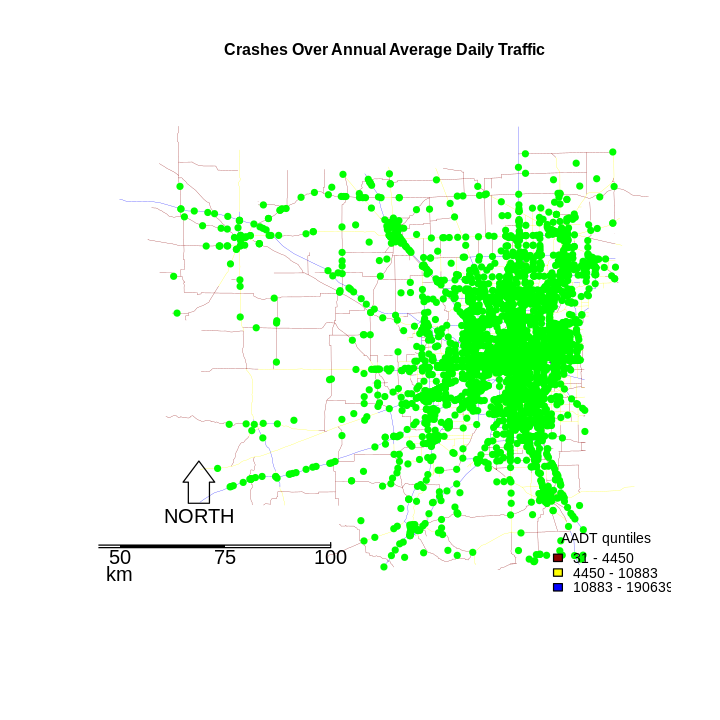

In [19]:
## Map aggregates
# Classify the variable.
numcat <- 3
cate <- classIntervals(dataset2roads@data$AADT, numcat, style="quantile")

## Assign colors to categories.
pal <- c('red4','yellow','blue')
cols <- findColours(cate,pal)

## Visualize fitted SAR values.
plot(dataset2roads, col=cols, lwd=.2,main="Crashes Over Annual Average Daily Traffic",cex.main=.8)
points(dataset2crashpoints, col = 'green', pch = 20)
brks <- round(cate$brks,3)
leg <- paste(brks[-(numcat+1)], brks[-1], sep=" - ")
legend("bottomright", fill=pal, legend=leg, bty="n",title="AADT quntiles",cex=.7)

extent <- bbox(dataset2roads)
xmin<-extent[1,1]
xmax<-extent[1,2]
ymin<-extent[2,1]
ymax<-extent[2,2]

xa <- xmin + (xmax - xmin)*0.15
ya <- ymin + (ymax - ymin)*0.15
len <- 2500

xs <- xmin
ys <- ymin + (ymax - ymin)*0.05

north.arrow(xa,ya,len,lab='NORTH',cex.lab=1,tcol='black')

len2 <- 100000
ndivs <- 4
subdiv <- (len2/1000)/ndivs
map.scale(xs,ys,len2,units='km',ndivs,subdiv,tcol='black',sfcol='black')

Warning message:
“position_stack requires non-overlapping x intervals”

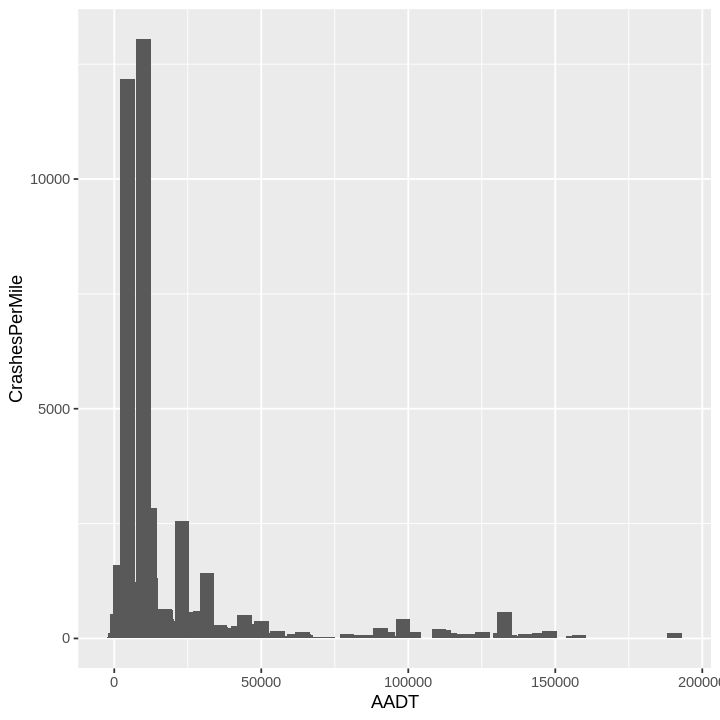

In [20]:
ggplot(data=dataset2roads@data, aes(x=AADT, y=CrashesPerMile, width=5000)) + geom_bar(stat="identity")

**Task 15:** Dataset 3 Analysis.

In [21]:
## 15. Develop your code for the analysis of Dataset 3 here.
## --------------------------------------
dataset3 <-  grds
modeledResiduals <- rep(NA, 3)
model_reg_list <- c("model1","model2","model3")

# Fit a linear regression model for each grid with "CrashesPerMile" as the target variable
for(i in 1:length(dataset3)){
    ## Conduct a linear regression.
    model_reg <- lm(dataset3[[i]]@data$CrashesPerPolygon ~ dataset3[[i]]@data$TotalRoadMiles + dataset3[[i]]@data$Avg_Speed + 
                   dataset3[[i]]@data$AADT_density + dataset3[[i]]@data$Sig_density + dataset3[[i]]@data$Stop_density + 
                   dataset3[[i]]@data$OtherInt_density + dataset3[[i]]@data$LW_density)
    ## Save the modeled residuals.
    modeledResiduals[[i]] <- as.data.frame(residuals(model_reg))
    modeledResiduals[[i]]$id <- row.names(modeledResiduals[[i]])
    colnames(modeledResiduals[[i]])<- c("resid","id")    
    print(summary(model_reg))
    print(head(modeledResiduals[[i]]))
    print("------------------------------------------------------------------------------------------------------------------")
    
    assign(paste0(model_reg_list[i]), model_reg)
}


Call:
lm(formula = dataset3[[i]]@data$CrashesPerPolygon ~ dataset3[[i]]@data$TotalRoadMiles + 
    dataset3[[i]]@data$Avg_Speed + dataset3[[i]]@data$AADT_density + 
    dataset3[[i]]@data$Sig_density + dataset3[[i]]@data$Stop_density + 
    dataset3[[i]]@data$OtherInt_density + dataset3[[i]]@data$LW_density)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3341 -0.0026 -0.0026 -0.0026 15.8058 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          2.564e-03  1.050e-02   0.244    0.807    
dataset3[[i]]@data$TotalRoadMiles    1.308e-03  1.898e-05  68.926  < 2e-16 ***
dataset3[[i]]@data$Avg_Speed        -4.138e-03  7.079e-04  -5.846 5.18e-09 ***
dataset3[[i]]@data$AADT_density      4.730e-05  1.190e-06  39.759  < 2e-16 ***
dataset3[[i]]@data$Sig_density       4.680e-01  4.056e-02  11.537  < 2e-16 ***
dataset3[[i]]@data$Stop_density     -5.949e-01  1.180e-01  -5.043 4.65e-07 ***
dataset3[[i]]@data$OtherInt

In [22]:
modeledResiduals2 <- rep(NA, 3)
model_reg_list2 <- c("model4","model5","model6")

# Fit a linear regression model for each grid with "CrashesPerMile" as the target variable
for(i in 1:length(dataset3)){
    ## Conduct a linear regression.
    model_reg <- lm(dataset3[[i]]@data$CrashesPerPolygon ~ dataset3[[i]]@data$TotalRoadMiles + dataset3[[i]]@data$Sig_density + 
                    dataset3[[i]]@data$Stop_density + dataset3[[i]]@data$OtherInt_density + dataset3[[i]]@data$LW_density)
    ## Save the modeled residuals.
    modeledResiduals2[[i]] <- as.data.frame(residuals(model_reg))
    modeledResiduals2[[i]]$id <- row.names(modeledResiduals2[[i]])
    colnames(modeledResiduals2[[i]])<- c("resid","id")    
    print(summary(model_reg))
    print(head(modeledResiduals2[[i]]))
    print("------------------------------------------------------------------------------------------------------------------")
    
    assign(paste0(model_reg_list2[i]), model_reg)
}


Call:
lm(formula = dataset3[[i]]@data$CrashesPerPolygon ~ dataset3[[i]]@data$TotalRoadMiles + 
    dataset3[[i]]@data$Sig_density + dataset3[[i]]@data$Stop_density + 
    dataset3[[i]]@data$OtherInt_density + dataset3[[i]]@data$LW_density)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7956  0.0024  0.0024  0.0024 15.3198 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -2.356e-03  1.118e-02  -0.211  0.83312    
dataset3[[i]]@data$TotalRoadMiles    1.466e-03  1.838e-05  79.757  < 2e-16 ***
dataset3[[i]]@data$Sig_density       6.295e-01  4.301e-02  14.635  < 2e-16 ***
dataset3[[i]]@data$Stop_density     -9.661e-01  1.252e-01  -7.717 1.29e-14 ***
dataset3[[i]]@data$OtherInt_density -2.980e-02  1.020e-02  -2.921  0.00349 ** 
dataset3[[i]]@data$LW_density       -8.853e-02  2.818e-03 -31.412  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.98

## ANALYSIS SUMMARY

Provide a detailed summary of modeling processes you applied as well as the analytical results that were obtained.

**Summary 1:** Dataset 1 - Discuss the modeling process you applied/implemented as well as the results of the analysis.

**Summary 2:** Dataset 2 - Discuss the modeling process you applied/implemented as well as the results of the analysis.

**Summary 3:** Dataset 3 - Discuss the modeling process you applied/implemented as well as the results of the analysis.

# SAVE YOUR NOTEBOOK, then `File > Close and Halt`

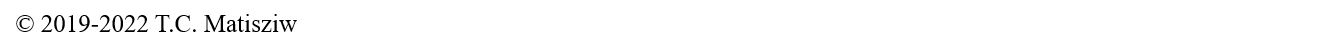